In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Data Preparation

In [ ]:
# importing the Iris dataset with pandas
dataset = pd.read_csv('googleps_cleaned.csv')

In [ ]:
print(dataset.head())
print(type(dataset))

In [ ]:
ds1_4 = dataset.iloc[:, [0,2,3,4,7,8]]
print (ds1_4.head())

In [ ]:
x = dataset.iloc[:, [0,2,3,4,7,8]].values
print(type(x))
x

## Elbow Method - Finding Optimum Number of Cluster for k-Means Classifications

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Training k-Means with 5 clusters

Using the elbow method, we decided that the optimal number of cluster is 5. Let's look at how the data looks like with 3 clusters. 

In [66]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_5.fit(x)
y_kmeans = kmeans_5.fit_predict(x)

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


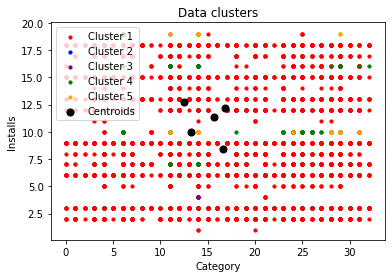

In [68]:
#Visualising the clusters by selecting only column 1 and 3
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], s = 10, c = 'purple', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 3], s = 10, c = 'green', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 3], s = 10, c = 'orange', label = 'Cluster 5')

#Plotting the centroids of the clusters
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:,3], s = 50, c = 'black', label = 'Centroids')
print (dataset.columns)
plt.title('Data clusters')
plt.xlabel(dataset.columns[0])
plt.ylabel(dataset.columns[4])

plt.legend()
plt.show()